In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
#sns.set(style="whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
df = pd.read_csv('data/data_raw.csv', low_memory=False, index_col=0)
df

,at,v,ap,rh,pe
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,NaN
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


# Trattamento dei valori mancanti

La prima cosa che faccio è quella di trovare eventuali missing values, attenzione che i missing values si possono presentare in modi diversi, possono essere NaN, oppure possono avere valori totalmente differenti dal range di valori del dato numerico che stiamo considerando come per esempio valori quali -999, oppure stringhe di testo come per esempio 'mancante'.

Quindi prima procedo cercando la presenza di eventuali NaN, di seguito tramite visualizzazioni della distribuzione del singolo dato numerico identifico la presenza di eventuali valori fuori range

In [3]:
df.isnull().sum()

at    1
v     0
ap    0
rh    0
pe    1
dtype: int64

Vi sono solo 2 valori mancanti con NaN, una percentuale molto bassa sul totale de dati

In [4]:
2/len(df)*100

0.020916126333403055

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9562 entries, 0 to 9561
Data columns (total 5 columns):
at    9561 non-null float64
v     9562 non-null float64
ap    9562 non-null float64
rh    9562 non-null float64
pe    9561 non-null float64
dtypes: float64(5)
memory usage: 448.2 KB


Si osserva che sono tutti dati numerici float64 di conseguenza escludiamo la possibilità che vi siano stringhe che possano indicare la presenza di eventuali missing values come per esempio 'manca'...

In [6]:
df.describe()

,at,v,ap,rh,pe
count,9561.000000,9562.000000,9562.000000,9562.000000,9561.000000
mean,19.649934,54.304997,1023.666162,73.313351,501.091809
std,7.453167,12.710158,1017.404967,14.601321,4568.388984
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.102500,63.340000,439.750000
50%,20.340000,52.080000,1012.950000,74.980000,451.620000
75%,25.720000,66.540000,1017.260000,84.837500,468.450000
max,37.110000,81.560000,100499.000000,100.160000,447150.000000


Dalla tabella soprastante si osserva inoltre che la variabile ap e la variabile target pe presentano dei valori fuori range molto distanti dal loro valor medio e di conseguenza sono sicuramente errori

Si osserva che vi sono solo 2 valori con NaN, uno nella colonna ap l'altro nella colonna target.

Vi sono numerose metodologie per trattare valori mancanti, le principali sono:

- Complete Case Analysis (CCA): consiste nel droppare tutte le righe che presentano valori mancanti, ok quando i valori mancanti sono pochi rispetto al numero dei dati, inoltre preserva la distribuzione della variabile

- Mean/median imputation: consiste nel sostituire i valori mancanti con la media (se distribuzione simmetrica) o mediana (se distribuzione distorta), ok quando valori mancanti sono pochi rispetto al numero dei dati altrimenti causa sottostima della varianza della variabile

- Random imputation: consiste nel sostituire i valori mancanti della variabile con campioni estratti in modo randomico dalla realizzazione della variabile stessa, vantaggio è che preserva la varianza della variabile  

- Arbitrary value imputation: consiste nel sostituire i valori mancanti della variabile con valori arbitrari, utile nel caso in cui i valori mancanti nascondano una informazione e non siano invece mancanti per ragioni dovute al caso

- Reconstruction: nel caso in cui i dati non siano iid cioè per esempio abbiano una dipendenza temporale è possibile ricostruire i valori mancanti con un modello, tramite interpolazione, tramite media tra il valore precedente e il valore successivo...

- ...

Nel nostro caso, dal momento che i dati mancanti sono solo 2 su 9562 cioè lo 0.02% possiamo tranquillamente utilizzare la CCA e dropparli dal dataset.

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

at    0
v     0
ap    0
rh    0
pe    0
dtype: int64

Abbiamo rimosso tutti i valori mancanti NaN, dobbiamo ancora verificare che le singole variabili non presentino valori fuori range tipici che indicano valori mancanti, i più tipici sono 0, -999...

Per farlo occorre visualizzare la distribuzione dei delle singole variabili tramite, per esempio, istogrammi e verificare che non vi siano distribuzioni di valori fuori dal range della variabile stessa, per esempio accumuli in 0 o in -999.

Lo facciamo trattando singolarmente le singole variabili e definendo una funzione appropriata in grado di plottare il segnale insieme alla sua distribuzione empirica 

In [10]:
def ts_hist(y, title='', bins=25, figsize=(10, 4)):

    fig = plt.figure(figsize=figsize)
    layout = (1, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    
    y.plot(ax=ts_ax, grid=True)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=bins)
    ts_ax.grid('True', linestyle='--')
    hist_ax.set_title('Histogram')
    hist_ax.grid('True', linestyle='--')
    #sns.despine()
    plt.tight_layout()

### ap

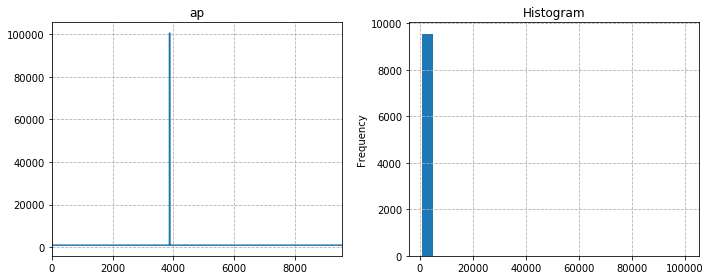

In [11]:
ts_hist(df.ap, title='ap')

E' evidente che questa variabile ha un valore completamente fuori range

In [12]:
df.loc[df.ap.idxmax(),'ap']

100499.0

In [13]:
df.loc[df.ap.idxmax()-10:df.ap.idxmax()+10,'ap']

3866      1005.13
3867      1014.35
3868      1018.13
3869      1006.71
3870      1009.77
3871      1011.96
3872      1010.96
3873      1010.76
3874      1014.32
3875      1017.45
3876    100499.00
3877      1021.83
3878      1007.78
3879      1008.01
3880      1016.07
3881      1005.82
3882      1011.20
3883      1003.95
3884      1015.35
3886      1014.31
Name: ap, dtype: float64

Vedendo i valori precedenti e successivi al valore si osserva come molto probabilmente vi sia stato un errore di posizionamento della virgola, infatti il valore è in linea con gli altri valori ma moltiplicato di un fattore 100, di conseguenza invece di sostituirlo con la media o mediana della variabile ap posso pensare di dividere questo valore per 100 per riottenere il valore presunto originale, ottenendo:

In [14]:
df.loc[df.ap.idxmax(),'ap'] = df.loc[df.ap.idxmax(),'ap']/100.0

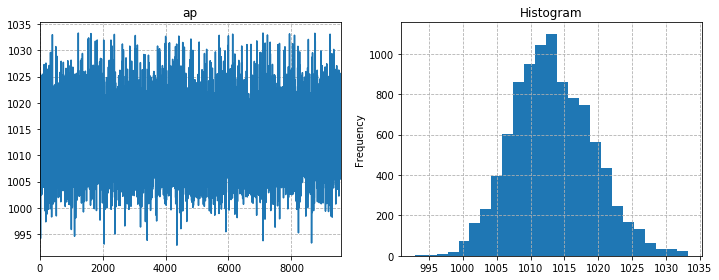

In [16]:
ts_hist(df.ap, title='ap')

Si osserva che la variabile ap è distribuita come una Gaussiana con media e deviazione standard campionarie:

In [17]:
df.ap.mean(), df.ap.std()

(1013.2605355648443, 5.93866150725406)

### pe

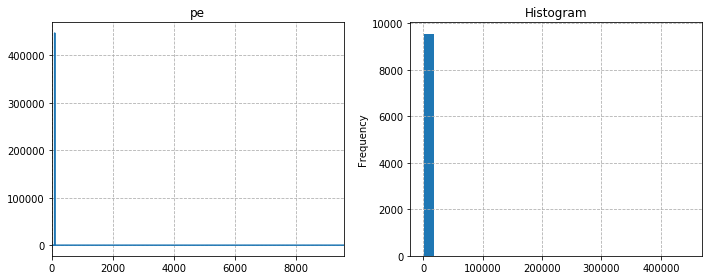

In [18]:
ts_hist(df.pe,title='pe')

In [19]:
df.loc[df.pe.idxmax()-10:df.pe.idxmax()+10,'pe']

84        462.58
85        483.27
86        438.51
87        431.03
88        484.00
89        431.64
90        451.78
91        439.46
92        467.23
93        459.81
94     447150.00
95        442.00
96        449.61
97        481.28
98        437.54
99        475.52
100       474.35
101       481.96
102       479.66
103       435.28
104       434.86
Name: pe, dtype: float64

Come nel caso di prima anche qui sembra che vi sia un valore con la virgola posizionata nel punto sbagliato, ma questa volta la differenza è di un fattore 1000

In [20]:
df.loc[df.pe.idxmax(),'pe'] = df.loc[df.pe.idxmax(),'pe']/1000.0

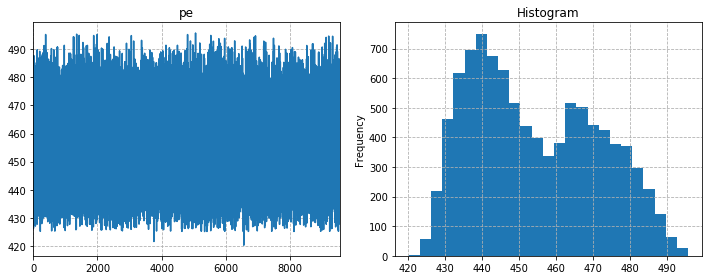

In [23]:
ts_hist(df.pe, title='pe')

Si osserva che pe è distribuita come una mistura di Gaussiane 

### at

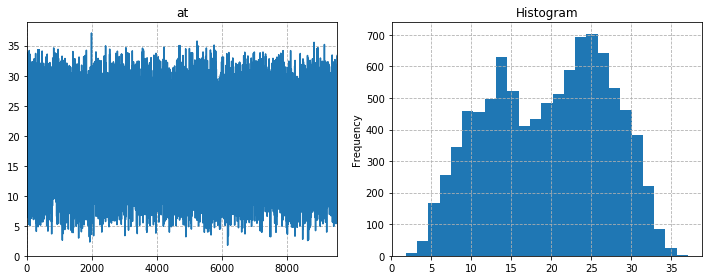

In [24]:
ts_hist(df['at'],title='at')

Si osserva che at è distribuita come una mistura di Gaussiane 

### v

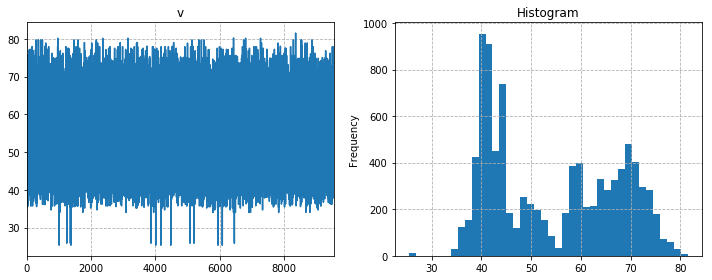

In [25]:
ts_hist(df.v, bins=40, title='v')

In entrambi i grafici sono evidenti degli outlier negativi 

### rh

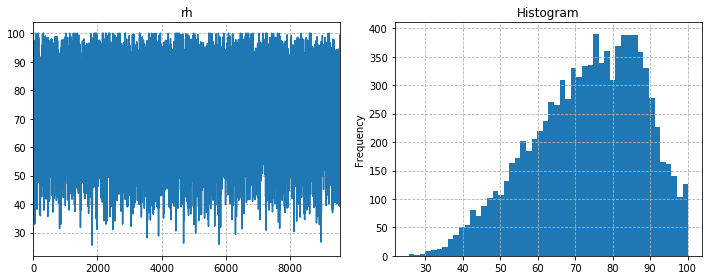

In [28]:
ts_hist(df.rh, title='rh',bins=50)

La variabile rh ha una distribuzione con skew negativa

In [29]:
df.rh.skew()

-0.43256798257214485

Questa variabile è stata sogliata a posteriori ad un massimo valore di 100.09, e ciò è reso ancora più evidente dal fatto che nel valore 100.09 vi è un picco di campioni, presumibilmente tutti quelli che superavano tale valore di soglia

In [31]:
df.rh.value_counts()

100.09    26
82.80     10
76.05      8
89.86      8
71.57      8
75.09      8
73.67      8
85.23      8
77.00      8
70.02      7
76.95      7
79.23      7
86.80      7
82.98      7
75.35      7
74.24      7
70.55      7
82.49      7
74.83      7
84.41      7
78.13      7
100.13     7
86.40      7
63.62      7
82.12      7
70.12      7
72.10      7
85.06      7
91.14      7
72.81      6
          ..
47.28      1
57.49      1
72.09      1
62.58      1
98.09      1
48.25      1
85.50      1
84.34      1
91.52      1
54.87      1
89.31      1
95.08      1
69.40      1
70.48      1
51.41      1
53.88      1
60.19      1
46.83      1
30.99      1
51.42      1
97.69      1
81.12      1
59.35      1
62.73      1
71.45      1
69.45      1
70.92      1
54.52      1
86.15      1
69.00      1
Name: rh, Length: 4544, dtype: int64

con una trasformazione è possibile centrarla e rimuovere la skew negativa, ciò può essere utile nel caso in cui si volesse fittare un modello lineare dal momento che tali modelli assumono che le variabili siano distribuite come della gaussiane

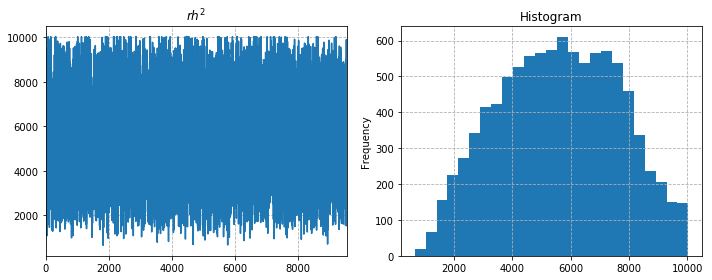

In [32]:
ts_hist((df.rh)**2, title='$rh^2$')

In [33]:
(df.rh**2).skew()

-0.024938020492951758

Salviamo il dataset pulito dei valori mancanti e dei valori errati

In [34]:
df.reset_index(drop=True).to_csv('data/data01.csv')